In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('amostras.csv', sep=',', index_col=0, header=0)

display(df)

,Tempo,Tensão no Resistor 180 ohms,Corrente no Resistor 180 ohms,Tensão na Carga,Corrente na Carga,Corrente Coleta
0,1.702904e+12,2.497556,511.0,2.429130,497.0,2.453568
1,1.702904e+12,2.502444,512.0,2.434018,498.0,2.453568
2,1.702904e+12,2.517107,515.0,2.443793,500.0,2.453568
3,1.702904e+12,2.526882,517.0,2.443793,500.0,2.458456
4,1.702904e+12,2.497556,511.0,2.434018,498.0,2.453568
...,...,...,...,...,...,...
21696,1.702904e+12,2.507331,513.0,2.434018,498.0,2.468231
21697,1.702904e+12,2.492669,510.0,2.443793,500.0,2.478006
21698,1.702904e+12,2.507331,513.0,2.448680,501.0,2.453568
21699,1.702904e+12,2.521994,516.0,2.448680,501.0,2.463343


In [4]:
# removendo as colunas de Corrente no Resistor 180 ohms e Corrente na Carga
df = df.drop(['Corrente no Resistor 180 ohms', 'Corrente na Carga'], axis=1)

In [5]:
# Subtraindo o valor inicial de cada valor de tempo e convertendo para segundos
df['Tempo'] = (df['Tempo'] - df['Tempo'].iloc[0]) / 1000

# Convertendo a parte do tempo para minutos e segundos
df['Minutos'] = df['Tempo'] // 60
df['Segundos'] = df['Tempo'] % 60

In [6]:
display(df)

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
0,0.000000,2.497556,2.429130,2.453568,0.0,0.000000
1,0.071750,2.502444,2.434018,2.453568,0.0,0.071750
2,0.079516,2.517107,2.443793,2.453568,0.0,0.079516
3,0.094500,2.526882,2.443793,2.458456,0.0,0.094500
4,0.106697,2.497556,2.434018,2.453568,0.0,0.106697
...,...,...,...,...,...,...
21696,354.219550,2.507331,2.434018,2.468231,5.0,54.219550
21697,354.235183,2.492669,2.443793,2.478006,5.0,54.235183
21698,354.250816,2.507331,2.448680,2.453568,5.0,54.250816
21699,354.266792,2.521994,2.448680,2.463343,5.0,54.266792


In [7]:
# Selecionamos apenas os 30 primeiros segundos como calda do transiente
amostras = df[(df['Minutos']>=0) & (df['Segundos'] >= 29.2) & (df['Minutos'] < 1) & (df['Segundos'] <= 30)]

display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
2003,29.204856,2.507331,2.434018,2.448680,0.0,29.204856
2004,29.214614,2.512219,2.453568,2.473118,0.0,29.214614
2005,29.231235,2.512219,2.414467,2.443793,0.0,29.231235
2006,29.247937,2.463343,2.424242,2.434018,0.0,29.247937
2007,29.264750,2.512219,2.429130,2.443793,0.0,29.264750
2008,29.280187,2.507331,2.434018,2.453568,0.0,29.280187
2009,29.297920,2.502444,2.434018,2.443793,0.0,29.297920
2010,29.303789,2.512219,2.438905,2.443793,0.0,29.303789
2011,29.314416,2.507331,2.434018,2.448680,0.0,29.314416
2012,29.330188,2.492669,2.429130,2.453568,0.0,29.330188


<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 2003 to 2058
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        56 non-null     float64
 1   Tensão no Resistor 180 ohms  56 non-null     float64
 2   Tensão na Carga              56 non-null     float64
 3   Corrente Coleta              56 non-null     float64
 4   Minutos                      56 non-null     float64
 5   Segundos                     56 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


# Primeiro 30 segundos

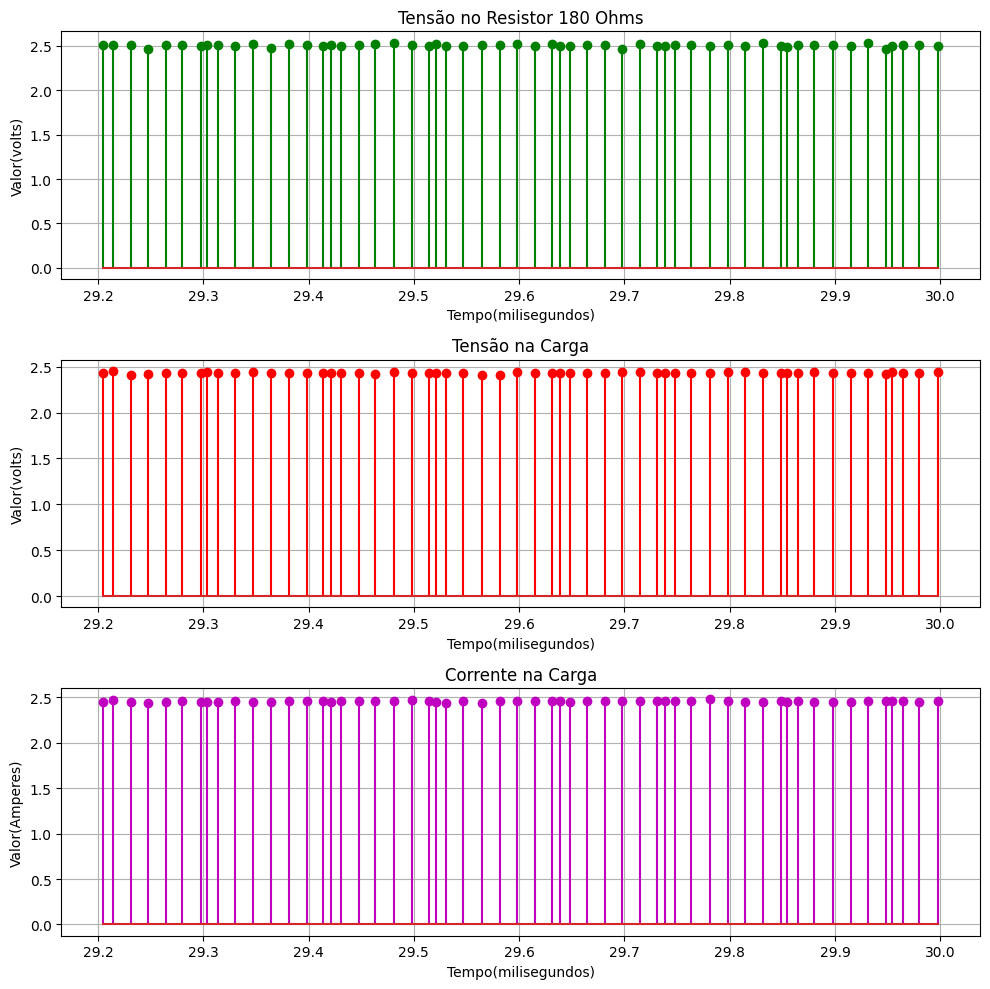

In [8]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# as distorções do sinal

In [9]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 30 a 60 segundos
amostras = df[(df['Minutos']>=0) & (df['Segundos'] >= 59.2) & (df['Minutos'] < 1) & (df['Segundos'] <= 60)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
4080,59.206204,2.580645,2.341153,2.458456,0.0,59.206204
4081,59.220701,2.565982,1.989247,2.473118,0.0,59.220701
4082,59.239104,2.561095,1.725318,2.453568,0.0,59.239104
4083,59.255734,2.531769,1.529814,2.458456,0.0,59.255734
4084,59.273514,2.512219,1.476051,2.453568,0.0,59.273514
4085,59.289144,2.497556,1.583578,2.448680,0.0,59.289144
4086,59.295713,2.463343,1.793744,2.448680,0.0,59.295713
4087,59.306414,2.458456,2.116325,2.448680,0.0,59.306414
4088,59.322645,2.458456,2.482893,2.458456,0.0,59.322645
4089,59.339129,2.443793,2.834800,2.453568,0.0,59.339129


<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 4080 to 4135
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        56 non-null     float64
 1   Tensão no Resistor 180 ohms  56 non-null     float64
 2   Tensão na Carga              56 non-null     float64
 3   Corrente Coleta              56 non-null     float64
 4   Minutos                      56 non-null     float64
 5   Segundos                     56 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


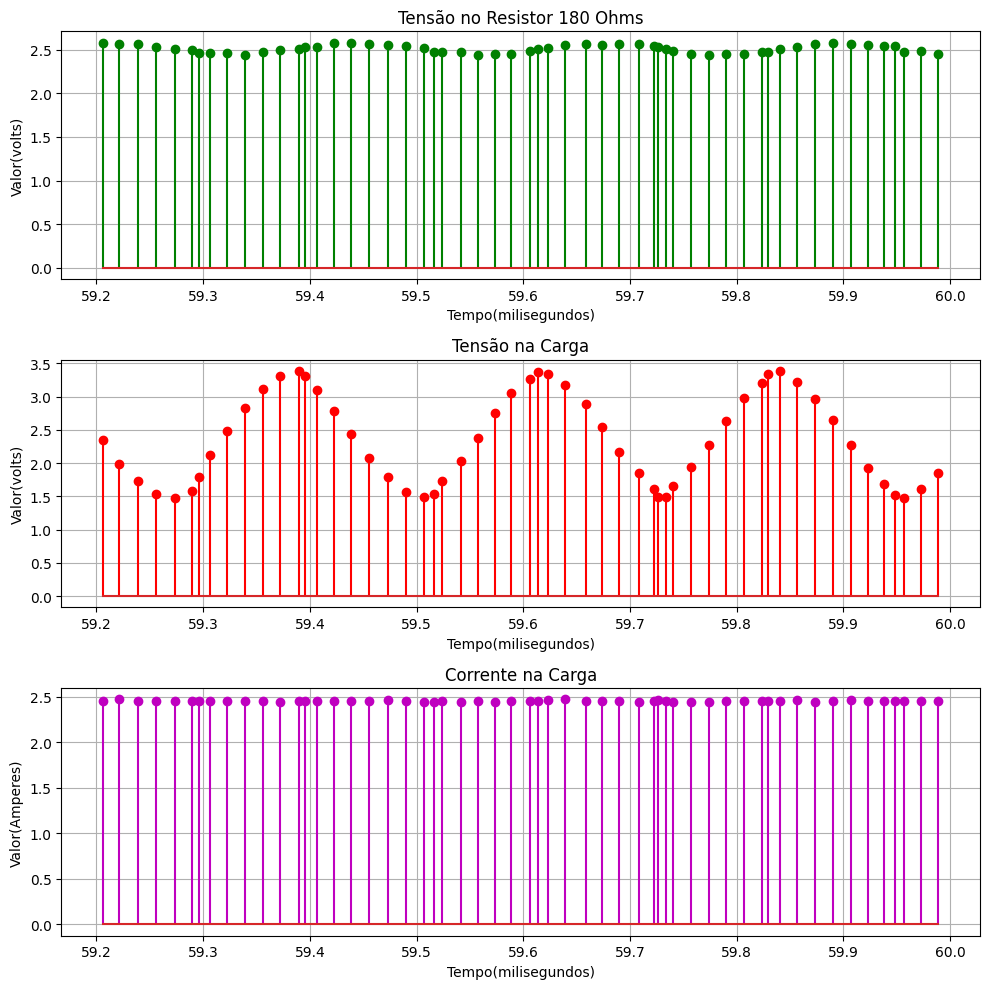

In [10]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 60 a 90 segundos
amostras = df[(df['Minutos']>=1) & (df['Segundos'] >= 29.2) & (df['Minutos'] < 2) & (df['Segundos'] <= 30)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
6135,89.215794,2.595308,1.832845,2.453568,1.0,29.215794
6136,89.232298,2.595308,1.642229,2.448680,1.0,29.232298
6137,89.241411,2.595308,1.554252,2.438905,1.0,29.241411
6138,89.248765,2.546432,1.627566,2.453568,1.0,29.248765
6139,89.264604,2.541544,1.793744,2.443793,1.0,29.264604
6140,89.281255,2.482893,2.082111,2.458456,1.0,29.281255
6141,89.299182,2.448680,2.390029,2.448680,1.0,29.299182
6142,89.315633,2.419355,2.732160,2.448680,1.0,29.315633
6143,89.332362,2.424242,3.000978,2.448680,1.0,29.332362
6144,89.348946,2.399804,3.201369,2.463343,1.0,29.348946


<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 6135 to 6190
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        56 non-null     float64
 1   Tensão no Resistor 180 ohms  56 non-null     float64
 2   Tensão na Carga              56 non-null     float64
 3   Corrente Coleta              56 non-null     float64
 4   Minutos                      56 non-null     float64
 5   Segundos                     56 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


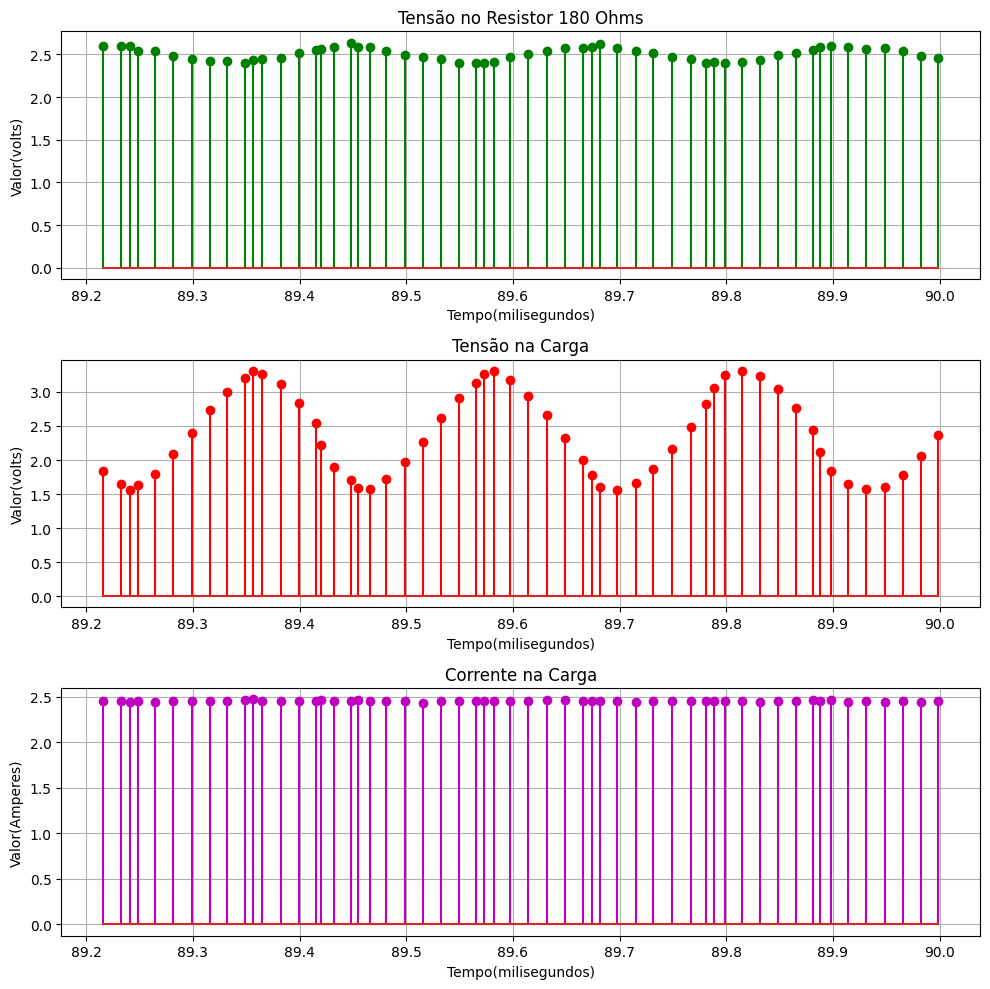

In [12]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 90 a 120 segundos
amostras = df[(df['Minutos']>=1) & (df['Segundos'] >= 59.2) & (df['Minutos'] < 2) & (df['Segundos'] <= 60)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
8200,119.207322,2.497556,3.377322,2.448680,1.0,59.207322
8201,119.222109,2.507331,3.304008,2.448680,1.0,59.222109
8202,119.238859,2.546432,3.103617,2.468231,1.0,59.238859
8203,119.246262,2.551320,2.795699,2.453568,1.0,59.246262
8204,119.257719,2.565982,2.448680,2.453568,1.0,59.257719
8205,119.273488,2.561095,2.101662,2.458456,1.0,59.273488
8206,119.290154,2.531769,1.798631,2.438905,1.0,59.290154
8207,119.307179,2.526882,1.583578,2.443793,1.0,59.307179
8208,119.321425,2.512219,1.490714,2.453568,1.0,59.321425
8209,119.324640,2.497556,1.524927,2.458456,1.0,59.324640


<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 8200 to 8255
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        56 non-null     float64
 1   Tensão no Resistor 180 ohms  56 non-null     float64
 2   Tensão na Carga              56 non-null     float64
 3   Corrente Coleta              56 non-null     float64
 4   Minutos                      56 non-null     float64
 5   Segundos                     56 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB


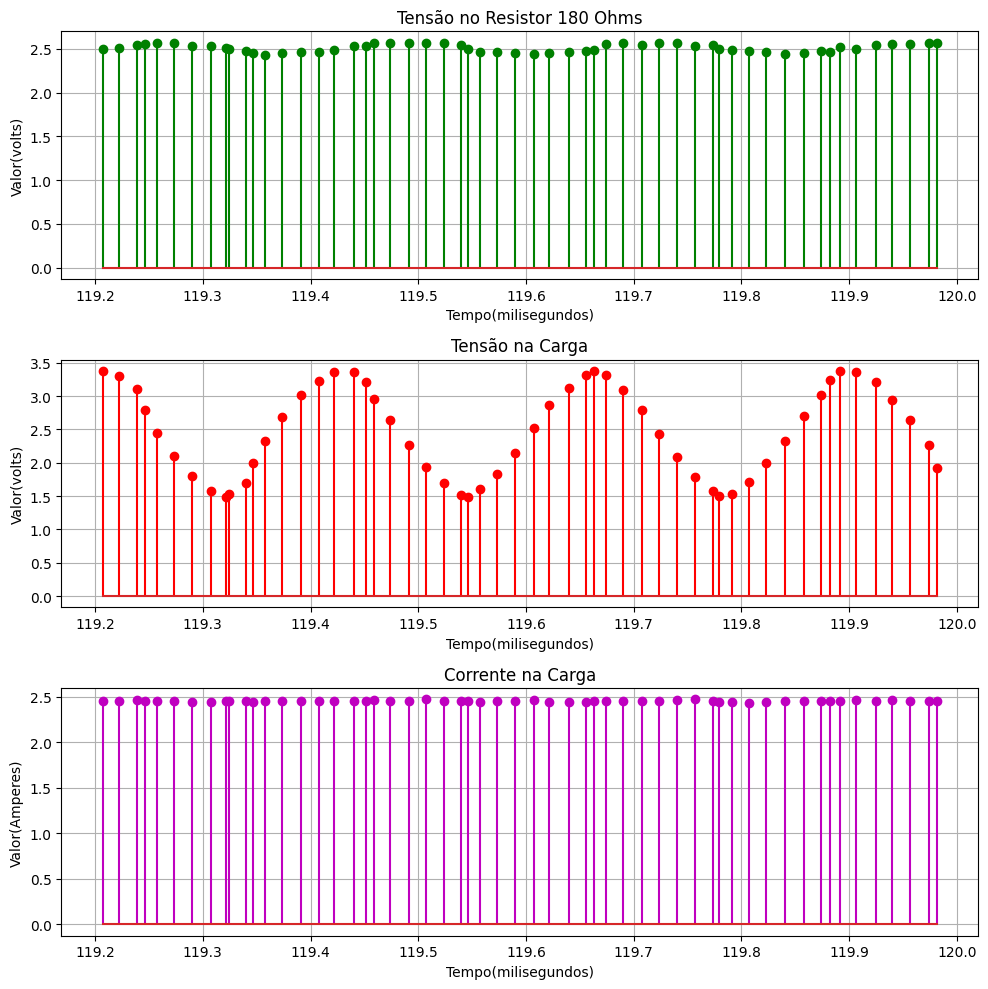

In [14]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 120 a 150 segundos
amostras = df[(df['Minutos']>=2) & (df['Segundos'] >= 29.2) & (df['Minutos'] < 3) & (df['Segundos'] <= 30)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
10100,149.215688,2.570870,2.404692,2.468231,2.0,29.215688
10101,149.233124,2.580645,2.082111,2.463343,2.0,29.233124
10102,149.249035,2.585533,1.827957,2.453568,2.0,29.249035
10103,149.270690,2.600196,1.632454,2.453568,2.0,29.270690
10104,149.283347,2.614858,1.564027,2.443793,2.0,29.283347
10105,149.299981,2.570870,1.627566,2.443793,2.0,29.299981
10106,149.315675,2.531769,1.808407,2.443793,2.0,29.315675
10107,149.336806,2.492669,2.086999,2.443793,2.0,29.336806
10108,149.349910,2.458456,2.414467,2.443793,2.0,29.349910
10109,149.370498,2.414467,2.746823,2.443793,2.0,29.370498


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 10100 to 10144
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        45 non-null     float64
 1   Tensão no Resistor 180 ohms  45 non-null     float64
 2   Tensão na Carga              45 non-null     float64
 3   Corrente Coleta              45 non-null     float64
 4   Minutos                      45 non-null     float64
 5   Segundos                     45 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


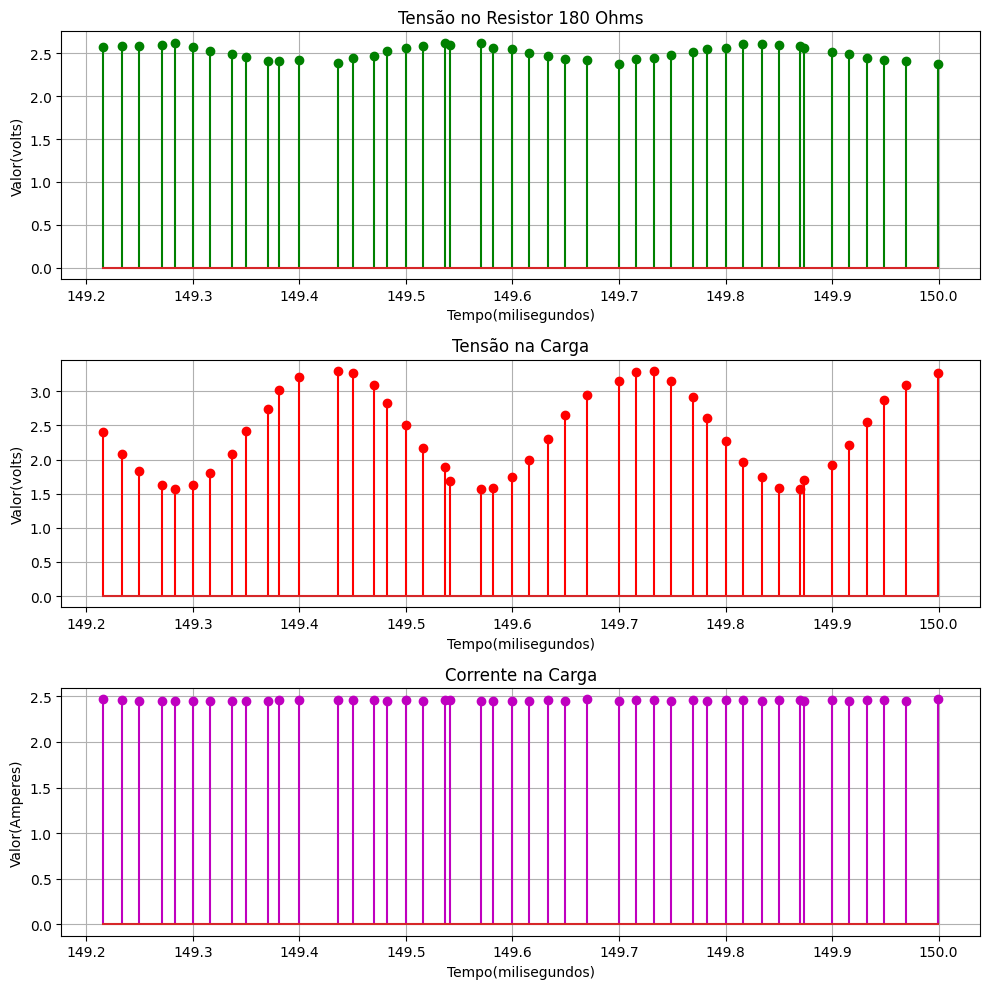

In [16]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 150 a 180 segundos
amostras = df[(df['Minutos']>=2) & (df['Segundos'] >= 59.2) & (df['Minutos'] < 3) & (df['Segundos'] <= 60)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
11797,179.208992,2.614858,2.209189,2.453568,2.0,59.208992
11798,179.224622,2.658847,1.955034,2.458456,2.0,59.224622
11799,179.242576,2.732160,1.788856,2.458456,2.0,59.242576
11800,179.257961,2.693060,1.705767,2.443793,2.0,59.257961
11801,179.275747,2.697947,1.710655,2.443793,2.0,59.275747
11802,179.292592,2.668622,1.842620,2.443793,2.0,59.292592
11803,179.309281,2.561095,2.072336,2.473118,2.0,59.309281
11804,179.324590,2.502444,2.331378,2.453568,2.0,59.324590
11805,179.342246,2.424242,2.619746,2.443793,2.0,59.342246
11806,179.357831,2.355816,2.878788,2.443793,2.0,59.357831


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 11797 to 11841
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        45 non-null     float64
 1   Tensão no Resistor 180 ohms  45 non-null     float64
 2   Tensão na Carga              45 non-null     float64
 3   Corrente Coleta              45 non-null     float64
 4   Minutos                      45 non-null     float64
 5   Segundos                     45 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


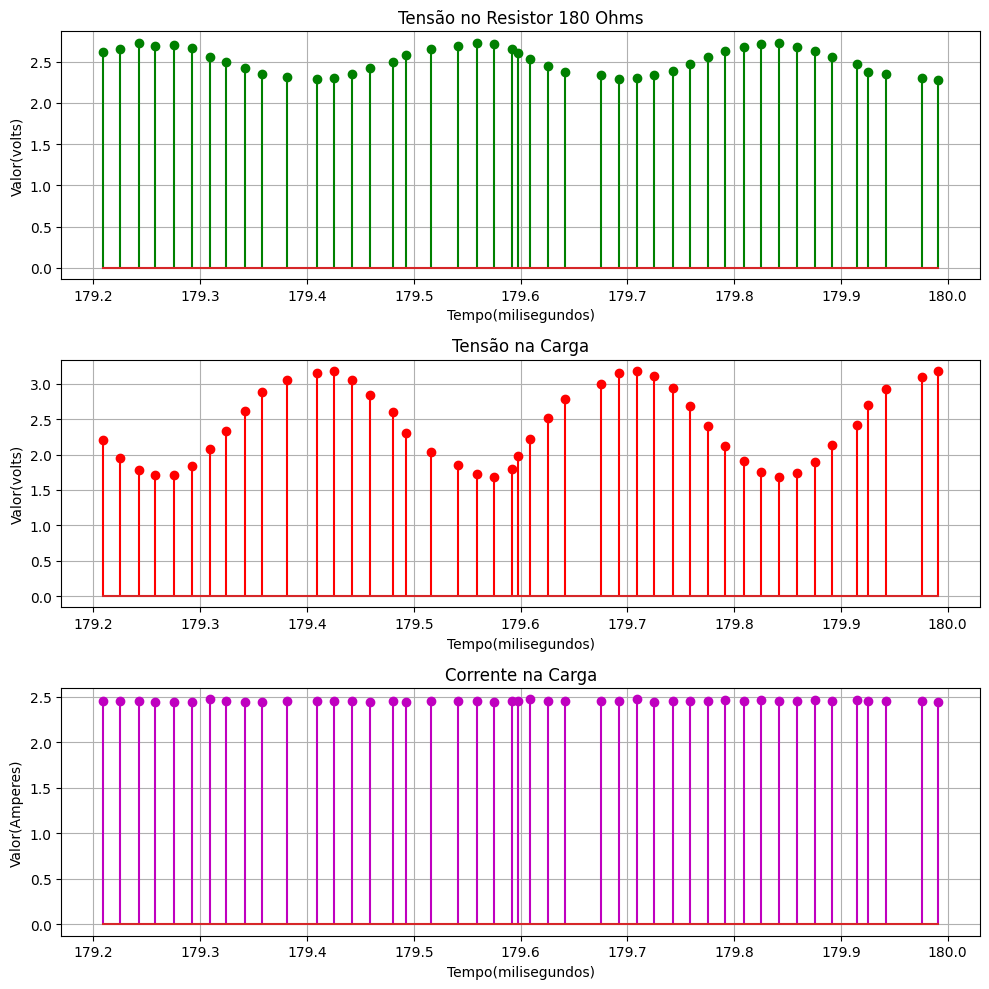

In [18]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# A cada 30 segundos temos um novo transiente, então vamos selecionar os dados de 180 a 210 segundos
amostras = df[(df['Minutos']>=3) & (df['Segundos'] >= 29.2) & (df['Minutos'] < 4) & (df['Segundos'] <= 30)]
display(amostras)
amostras.info()

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
13493,209.202107,2.502444,2.438905,2.453568,3.0,29.202107
13494,209.206246,2.531769,2.448680,2.453568,3.0,29.206246
13495,209.234285,2.521994,2.443793,2.443793,3.0,29.234285
13496,209.250151,2.517107,2.434018,2.468231,3.0,29.250151
13497,209.269418,2.517107,2.434018,2.443793,3.0,29.269418
13498,209.281550,2.487781,2.434018,2.468231,3.0,29.281550
13499,209.300862,2.502444,2.434018,2.443793,3.0,29.300862
13500,209.316792,2.502444,2.434018,2.468231,3.0,29.316792
13501,209.334322,2.502444,2.443793,2.448680,3.0,29.334322
13502,209.350097,2.521994,2.443793,2.448680,3.0,29.350097


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 13493 to 13537
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        45 non-null     float64
 1   Tensão no Resistor 180 ohms  45 non-null     float64
 2   Tensão na Carga              45 non-null     float64
 3   Corrente Coleta              45 non-null     float64
 4   Minutos                      45 non-null     float64
 5   Segundos                     45 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


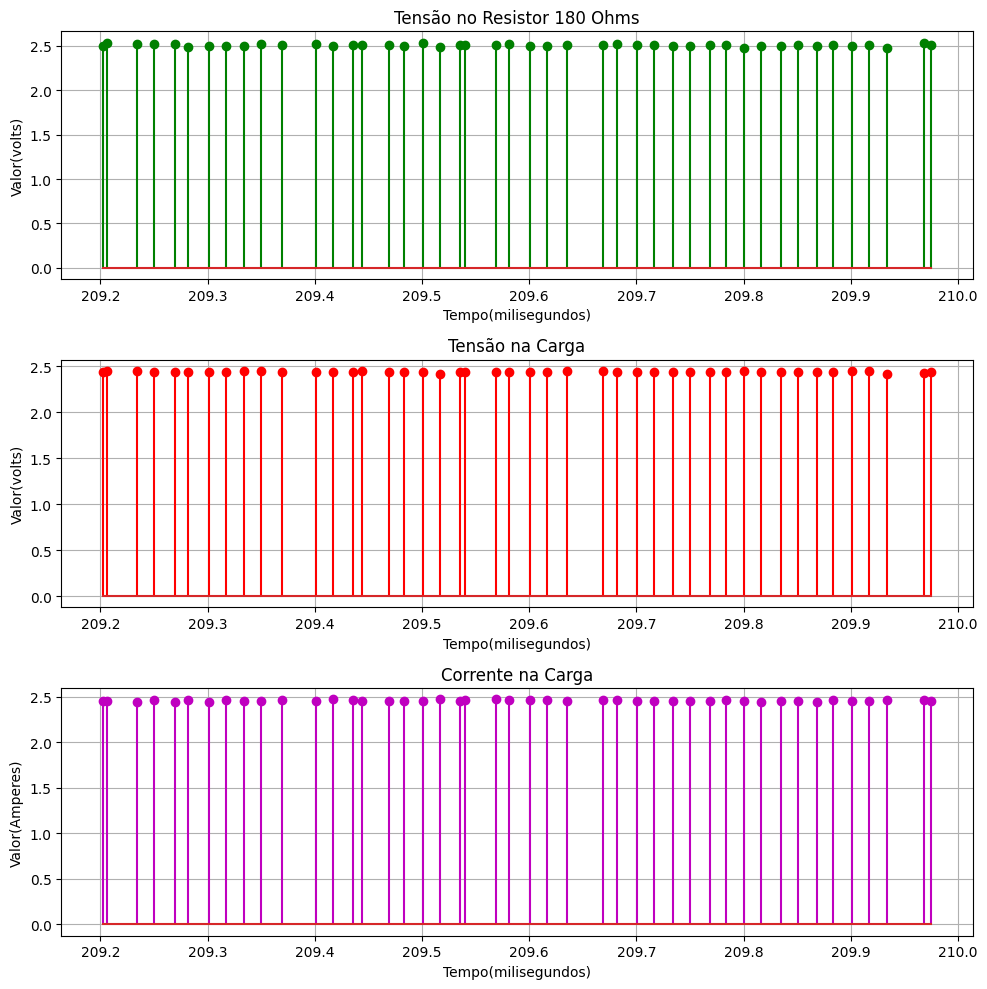

In [20]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Os ultimos 30 segundos

In [21]:
# Selecionamos apenas os 30 ultimos segundos como tail do transiente
amostras = df[(df['Minutos']>=4) & (df['Segundos'] >= 0) & (df['Minutos'] < 5) & (df['Segundos'] <= 1)] # Minutos	Segundos

display(amostras)
print(amostras.info())

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
15236,240.017198,2.507331,2.434018,2.458456,4.0,0.017198
15237,240.026695,2.463343,2.438905,2.473118,4.0,0.026695
15238,240.043997,2.512219,2.424242,2.453568,4.0,0.043997
15239,240.061067,2.502444,2.434018,2.448680,4.0,0.061067
15240,240.083570,2.507331,2.434018,2.473118,4.0,0.083570
15241,240.095163,2.507331,2.438905,2.463343,4.0,0.095163
15242,240.117591,2.497556,2.438905,2.458456,4.0,0.117591
15243,240.125491,2.517107,2.434018,2.453568,4.0,0.125491
15244,240.143619,2.502444,2.438905,2.468231,4.0,0.143619
15245,240.161056,2.492669,2.419355,2.458456,4.0,0.161056


<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 15236 to 15292
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        57 non-null     float64
 1   Tensão no Resistor 180 ohms  57 non-null     float64
 2   Tensão na Carga              57 non-null     float64
 3   Corrente Coleta              57 non-null     float64
 4   Minutos                      57 non-null     float64
 5   Segundos                     57 non-null     float64
dtypes: float64(6)
memory usage: 3.1 KB
None


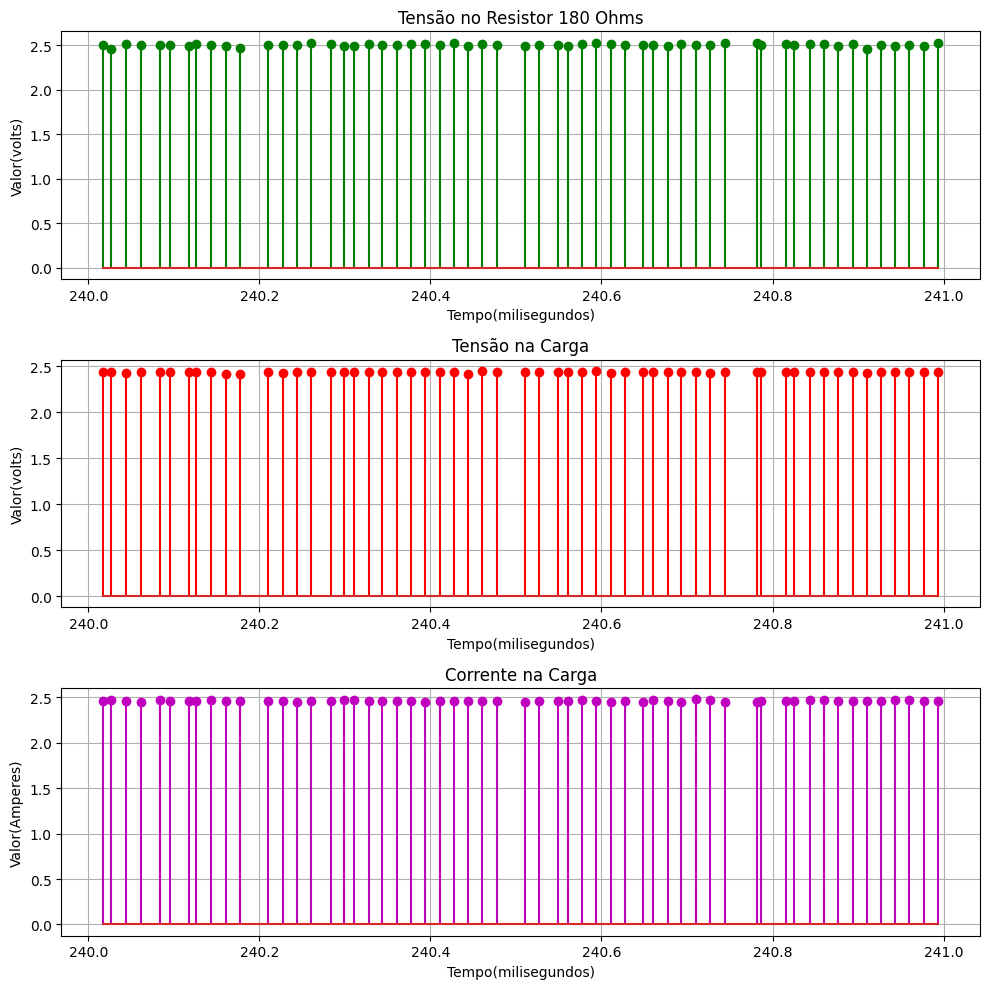

In [22]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()